Homework 4
Data 622
Joel Wheatley
9/28/2

Questions
Use the Gettysburg Address by Abraham Lincoln.
1. Tokenization
Tokenize both sentences into words using spaCy. Print the list of tokens for each sentence.
Also use the benepar library.
2. Part-of-Speech Tagging
Print the part-of-speech (POS) tag for each token in the first sentence.
3. Dependency Parsing
Print the dependency relation and head word for each token in the second sentence.
4. Constituent Parsing
Using the NLTK and benepar libraries, print the constituency (phrase structure) parse tree
of the first sentence.
5. Extract Noun Phrases
Using spaCy, extract all noun phrases (noun chunks) from both sentences.
5. CRF and HMM
Why do you use CRF and HMM? How do they differ? Please summarize in less than 50
words.

In [3]:
#!pip install benepar

#Required for visualing constiuency tree
#!pip install svgling

  Preparing metadata (setup.py) ... done
  Created wheel for benepar: filename=benepar-0.2.0-py3-none-any.whl size=37625 sha256=07558ade3b4c9670be8a56322514af99347f9865a74d5231b7168a4118de0e25
  Stored in directory: /root/.cache/pip/wheels/9b/84/c1/f2ac877f519e2864e7dfe52a1c17fe5cdd50819cb8d1f1945f
Successfully built benepar
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 6.4 MB/s eta 0:00:00


In [4]:
import spacy
import benepar
import nltk
nltk.download('punkt_tab')
benepar.download('benepar_en3')
nlp = spacy.load("en_core_web_sm")

#recommended use from benepar documentation website
if spacy.__version__.startswith('2'):
        nlp.add_pipe(benepar.BeneparComponent("benepar_en3"))
else:
        nlp.add_pipe("benepar", config={"model": "benepar_en3"})

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package benepar_en3 to /root/nltk_data...
[nltk_data]   Unzipping models/benepar_en3.zip.
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Tokenize both sentences into words using spaCy. Print the list of tokens for each sentence. Also use the benepar library.

In [5]:
text = "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this. But, in a larger sense, we can not dedicate, we can not consecrate, we can not hallow, this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the great task remaining before us, that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion, that we here highly resolve that these dead shall not have died in vain, that this nation, under God, shall have a new birth of freedom, and that government of the people, by the people, for the people, shall not perish from the earth."
#text = "This is a basic senctence. This is the second sentence to analyze. This one won't have a contraction"
#print(text)
doc = nlp(text)

for sentence in doc.sents:
  for token in sentence:
    print(token.text)

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.12/dist-packages/torch/distributions/distribution.py:62: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(


Four
score
and
seven
years
ago
our
fathers
brought
forth
on
this
continent
,
a
new
nation
,
conceived
in
Liberty
,
and
dedicated
to
the
proposition
that
all
men
are
created
equal
.
Now
we
are
engaged
in
a
great
civil
war
,
testing
whether
that
nation
,
or
any
nation
so
conceived
and
so
dedicated
,
can
long
endure
.
We
are
met
on
a
great
battle
-
field
of
that
war
.
We
have
come
to
dedicate
a
portion
of
that
field
,
as
a
final
resting
place
for
those
who
here
gave
their
lives
that
that
nation
might
live
.
It
is
altogether
fitting
and
proper
that
we
should
do
this
.
But
,
in
a
larger
sense
,
we
can
not
dedicate
,
we
can
not
consecrate
,
we
can
not
hallow
,
this
ground
.
The
brave
men
,
living
and
dead
,
who
struggled
here
,
have
consecrated
it
,
far
above
our
poor
power
to
add
or
detract
.
The
world
will
little
note
,
nor
long
remember
what
we
say
here
,
but
it
can
never
forget
what
they
did
here
.
It
is
for
us
the
living
,
rather
,
to
be
dedicated
here
to
the
unfinished
work
which
they


Print the part-of-speech (POS) tag for each token in the first sentence.

In [6]:
nlp_sents = list(doc.sents)
for token in nlp_sents[0]:
  print(token.pos_)

NUM
NOUN
CCONJ
NUM
NOUN
ADV
PRON
NOUN
VERB
ADV
ADP
DET
NOUN
PUNCT
DET
ADJ
NOUN
PUNCT
VERB
ADP
PROPN
PUNCT
CCONJ
VERB
ADP
DET
NOUN
SCONJ
DET
NOUN
AUX
VERB
ADJ
PUNCT


Dependency Parsing Print the dependency relation and head word for each token in the second sentence.

In [7]:
for token in nlp_sents[1]:
  print(token.dep_, token.head)

advmod engaged
nsubjpass engaged
auxpass engaged
ccomp endure
prep engaged
det war
amod war
amod war
pobj in
punct engaged
advcl engaged
mark conceived
det nation
nsubj conceived
punct nation
cc nation
det nation
conj nation
advmod conceived
ccomp testing
cc conceived
advmod dedicated
conj conceived
punct endure
aux endure
advmod endure
ROOT endure
punct endure


Constituent Parsing: Using the NLTK and benepar libraries, print the constituency (phrase structure) parse tree of the first sentence.


You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


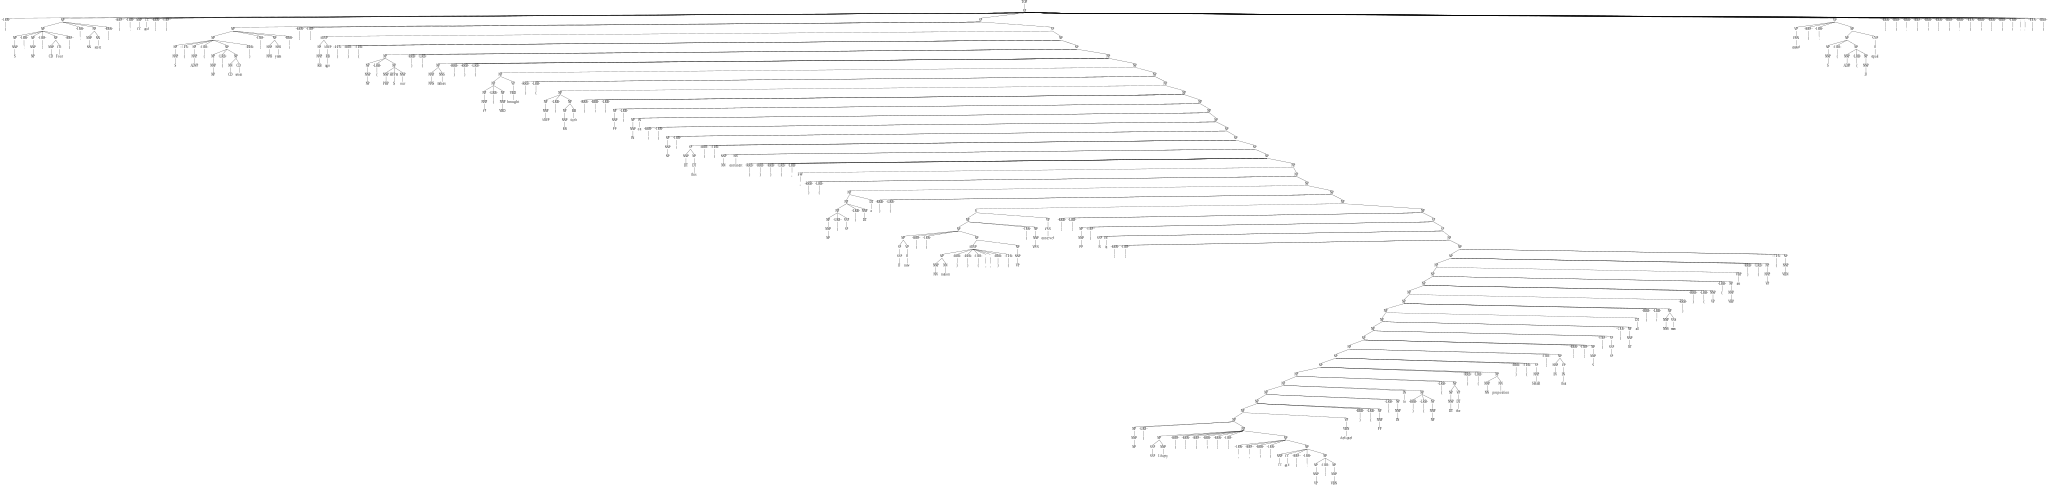

In [8]:
parser = benepar.Parser("benepar_en3")

#Got error saying punt_tab was missing here, so that is why that was downloaded earlier
parser.parse(nlp_sents[0]._.parse_string)

In [9]:
type(nlp_sents[0])

spacy.tokens.span.Span

Extract Noun Phrases: Using spaCy, extract all noun phrases (noun chunks) from both sentences.

In [10]:
num_sentences = 2

for i in range(num_sentences):
  for noun in nlp_sents[i].noun_chunks:
    print(noun.text)

Four score
our fathers
this continent
a new nation
Liberty
the proposition
all men
we
a great civil war
that nation
any nation


CRF and HMM: Why do you use CRF and HMM? How do they differ? Please summarize in less than 50 words.

You use CRF and HMM to identify parts of speech in a text. While HMM's are a specific case of CRF, Hidden Markov Models are generative and use joint probability distributions. Conditional random fields, by comparison, are discriminative and model conditional probability distributions.